# [Riddler Classic May 19th 2023](https://fivethirtyeight.com/features/how-much-money-can-you-pull-out-of-a-hat/): how-much-money-can-you-pull-out-of-a-hat?

## My idea

First thing I noticed is the huge size of the search space: 2^100 possibilities, not even mentioning the possible values.
So, bruteforcing is not an option.

Then, a bit of vocabulary: at each round, we have two possible actions (either cash in and not extend* the range of numbers in the hat, or not cash in and extend the range of numbers), I call these actions respectively "cash in" and "extend".

*a note about "extending": the text is not specific enough ("add k `higher` numbers to the hat") in my opinion regarding the way we can select the new numbers, so below I'll be following the example given, assuming that whenever we extend over the current range of hat numbers 1...n by picking up the number k (1 <= k <= n), it means we must arrive at the new range 1...n+k.

After giving some thought and trying out the game by hand for small numbers of rounds (1 to 5), exhausting all possibilities, I noticed that a better way to analyse the possible outcomes is to look at the number of times we're "extending" throughout the course of the game, as:

1) there are only 100 possibilities

2) there is an only arrangement that maximises the average outcome once we decide on extending a fixed number of times (see below)

I also noticed additional points:
- at the last round, it is always best to cash in instead of extending
- if the player decides to extend p times throughout the game, then it's best to start the game extending p times in a row, as this yields the highest average payout
- if at any given round the range of numbers is 1...n, then the average value pulled out is (n+1)/2. Importantly, this holds if n is decimal (which can happen by averaging ranges).
Then at any given round, say with the range 1...n, extending means that the next average value pulled out will be multiplied by 1.5, i.e. a 50% increase. This is linked to the previous point: 1...n = > avg value pulled out is (n+1)/2 => range gets extended to 1...n + (n+1)/2 => avg value pulled out is (n + (n+1)/2 + 1) / 2 = ((3*n+3)/2)/2 = 3/2 * ((n+1)/2)

With all these observations, the question boils down to: how many times in a row should I extend before cashing in till the end of the game?
Mathematically, this is asking for:

$\max_{n=1}^{100} \left(1.5^n \cdot (100 - n)\right)$

## Plotting the scenarios

In [30]:
import matplotlib.pyplot as plt
from decimal import Decimal

### Linear scale on y-axis

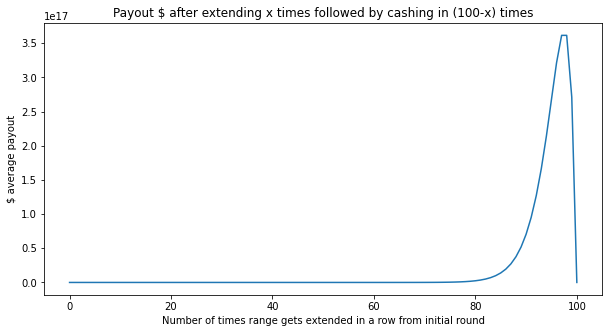

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Payout $ after extending x times followed by cashing in (100-x) times')
plt.xlabel('Number of times range gets extended in a row from initial round')
plt.ylabel('$ average payout')
plt.plot(range(101), [1.5**x * (100-x) for x in range(101)]);

### Log scale on y-axis

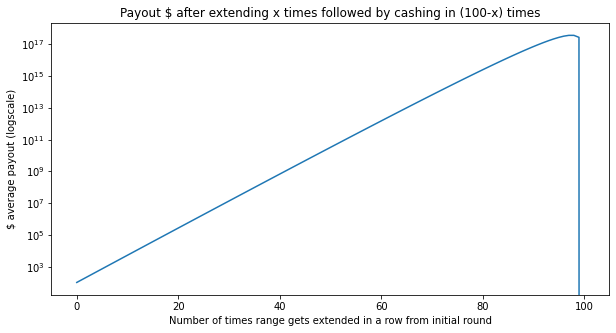

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Payout $ after extending x times followed by cashing in (100-x) times')
plt.xlabel('Number of times range gets extended in a row from initial round')
plt.yscale('log')
plt.ylabel('$ average payout (logscale)')
plt.plot(range(101), [1.5**x * (100-x) for x in range(101)]);

Due to the 1.5^n factor, this is now linear

## Answer

In [20]:
f'The max average payout is {max(1.5**x*(100-x) for x in range(101))} $ after extending {(nb_extend := max(range(101), key = lambda x : 1.5**x*(100-x)))} times then cashing in {100 - nb_extend} times '

'The max average payout is 3.613877133646358e+17 $ after extending 97 times then cashing in 3 times '

In [32]:
f"The value with all digits is {format(Decimal(1.5**97*3), ',')} $"

'The value with all digits is 361,387,713,364,635,776 $'